In [195]:
import pandas as pd
import numpy as np
from sklearn import model_selection, metrics
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import Nystroem
from sklearn.multiclass import OneVsRestClassifier
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, OneSidedSelection, EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

pd.set_option('display.max_columns', 500)

cl_dict = {
    0: 'Deceased',
    1: 'Hospitalized',
    2: 'Recovered',
    3: 'Recovered (hospitalized)'
}

labels = list(cl_dict.values())

In [191]:
df = pd.read_pickle('./processed-data.pkl')

X = df.drop(['outcome'], axis=1).values
y = df['outcome'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.1, random_state=0)

In [205]:
dt_clf = make_pipeline(
    DecisionTreeClassifier(random_state=42, criterion='entropy', class_weight="balanced", min_samples_leaf=8, ccp_alpha = 0.00005)
)

dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)

In [202]:
print("Decision tree report")
print(metrics.classification_report(y_test, dt_y_pred, target_names=labels))

Decision tree report
                          precision    recall  f1-score   support

                Deceased       0.05      0.63      0.09       600
            Hospitalized       0.89      0.58      0.71     20340
               Recovered       0.65      0.65      0.65      9751
Recovered (hospitalized)       0.63      0.97      0.77        34

                accuracy                           0.61     30725
               macro avg       0.56      0.71      0.55     30725
            weighted avg       0.80      0.61      0.68     30725



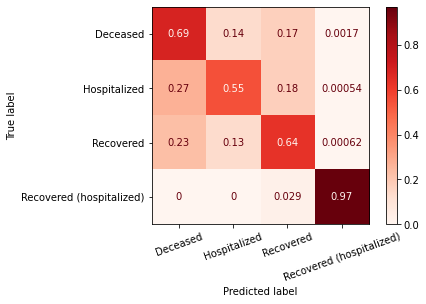

In [208]:
metrics.plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=labels, xticks_rotation=20, normalize='true', cmap=plt.get_cmap('Reds'))

In [178]:
rf_clf = make_pipeline(
    RandomForestClassifier(n_estimators=2, random_state=78, class_weight="balanced")
)

rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

In [179]:
print("Random forest report")
print(metrics.classification_report(y_test, rf_y_pred, target_names=labels))

Random forest report
                          precision    recall  f1-score   support

                Deceased       0.05      0.50      0.10       600
            Hospitalized       0.88      0.67      0.76     20340
               Recovered       0.68      0.68      0.68      9751
Recovered (hospitalized)       0.91      0.62      0.74        34

                accuracy                           0.67     30725
               macro avg       0.63      0.62      0.57     30725
            weighted avg       0.80      0.67      0.72     30725



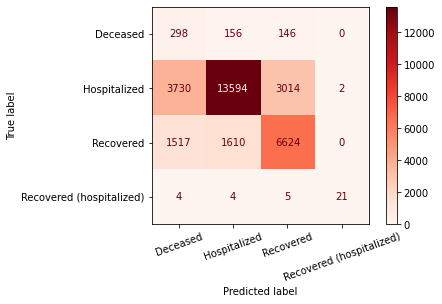

In [199]:
metrics.plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=labels, xticks_rotation=20, cmap=plt.get_cmap('Reds'))

In [217]:
xgb_clf = make_pipeline(
    xgb.XGBClassifier(use_label_encoder=False, verbosity=0, objective="multi:softprob")
)

xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)

In [218]:
print("XGB report")
print(metrics.classification_report(y_test, xgb_y_pred, target_names=labels))

XGB report
                          precision    recall  f1-score   support

                Deceased       0.77      0.11      0.20       600
            Hospitalized       0.78      0.95      0.86     20340
               Recovered       0.82      0.49      0.62      9751
Recovered (hospitalized)       1.00      0.91      0.95        34

                accuracy                           0.79     30725
               macro avg       0.84      0.62      0.66     30725
            weighted avg       0.80      0.79      0.77     30725



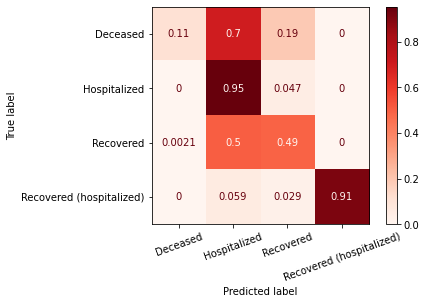

In [211]:
metrics.plot_confusion_matrix(xgb_clf, X_test, y_test, display_labels=labels, normalize='true', xticks_rotation=20, cmap=plt.get_cmap('Reds'))